data Shape (569, 31)
sample data    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perime

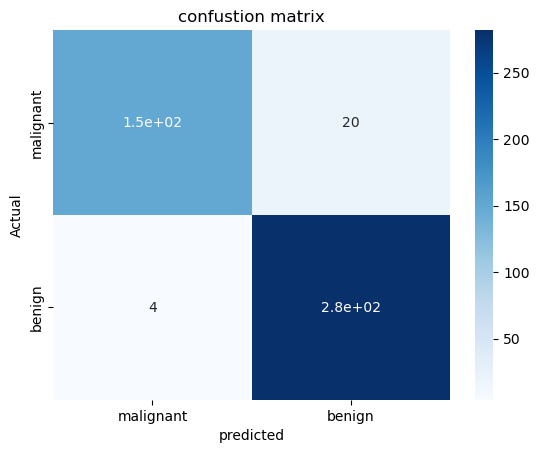

new patient prediction,data.target malignant


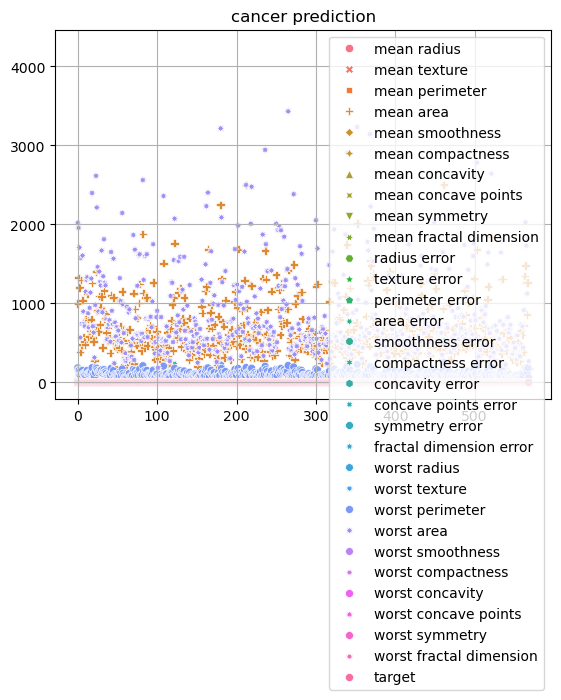

In [41]:
# brest cancer  detection project
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import load_breast_cancer
# loading the data set

data=load_breast_cancer()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
# print(data)

df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target   #0->maligant and 1-> benign


# exploring the data 
print("data Shape",df.shape)
print("sample data",df.head())
print("target classes",data.target_names)

# train test and split
X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=42,stratify=y)


# model training
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

# now predicton and evaluation
y_pred=model.predict(X_test)
print("Classification report\n",classification_report(y_test,y_pred,target_names=data.target_names))


# confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,cmap="Blues",xticklabels=data.target_names,yticklabels=data.target_names)


plt.title("confustion matrix")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()


# predicting the new sample

sample=pd.DataFrame([X.iloc[0]])

pred=model.predict(sample)
print ("new patient prediction,data.target",data.target_names[pred[0]])

sns.scatterplot(data=df)
plt.title("cancer prediction")
            
plt.grid(True)
plt.show()   
